In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-20 07:42:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 173.194.76.128, 2a00:1450:400c:c1b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   198MB/s    in 0.3s    

2022-03-20 07:42:20 (198 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential

In [ ]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):

  shutil.rmtree('/content/cats_and_dogs_filtered/')
  print('/content/cats_and_dogs_filtered/ is removed !!!')

In [ ]:
import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:
  target_file.extractall('/content/cats_and_dogs_filtered/')

In [ ]:
train_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
test_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 10,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_data_gen.flow_from_directory(directory = train_dir,
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    class_mode = 'sparse',
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT))

test_data = test_data_gen.flow_from_directory(directory = test_dir,
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    class_mode = 'sparse',
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT))

print(train_data.class_indices)
print(train_data.num_classes)
print(train_data.class_mode)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
2
sparse


In [ ]:
base_model = MobileNet(weights = 'imagenet',input_shape = (224, 224, 3), include_top = False)

base_model.summary()

17235968/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 16)                16400     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,245,298
Trainable params: 3,223,410
Non-

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(2e-5), metrics = ['accuracy'])

In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = '/content/cats_and_dogs_filtered_Xception_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'auto'
                             )

earlystopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5)

start_time = datetime.now()

hist = model.fit(train_data, epochs = 20,
                 validation_data = test_data) # iterator은 next()를 호출해줘야되는데, fit은 next()를 자동으로 호출해줌!!

end_time = datetime.now()

print('elapsed time = ', end_time - start_time)

Epoch 1/20
63/63 [==============================] - 394s 6s/step - loss: 0.4975 - accuracy: 0.7585 - val_loss: 0.3929 - val_accuracy: 0.8000
Epoch 2/20
63/63 [==============================] - 384s 6s/step - loss: 0.2356 - accuracy: 0.9225 - val_loss: 0.1948 - val_accuracy: 0.9280
Epoch 3/20
63/63 [==============================] - 400s 6s/step - loss: 0.1648 - accuracy: 0.9430 - val_loss: 0.1107 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 402s 6s/step - loss: 0.1290 - accuracy: 0.9555 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 5/20
63/63 [==============================] - 402s 6s/step - loss: 0.1038 - accuracy: 0.9695 - val_loss: 0.0594 - val_accuracy: 0.9800
Epoch 6/20
63/63 [==============================] - 401s 6s/step - loss: 0.0873 - accuracy: 0.9685 - val_loss: 0.0478 - val_accuracy: 0.9820
Epoch 7/20
63/63 [==============================] - 396s 6s/step - loss: 0.0782 - accuracy: 0.9760 - val_loss: 0.0456 - val_accuracy: 0.9840
Epoch 8/20
63

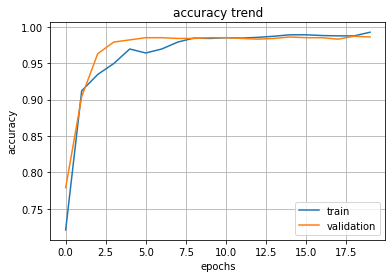

In [ ]:
import matplotlib.pyplot as plt

plt.title('accuracy trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'validation')
plt.legend(loc = 'best')
plt.show()

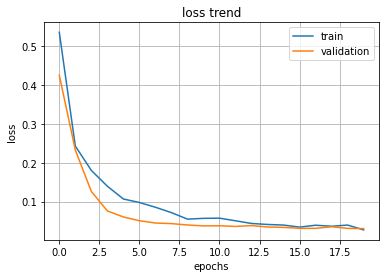

In [ ]:
plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

In [ ]:
import zipfile
with zipfile.ZipFile('/content/test_dir.zip', 'r') as target_file:
  target_file.extractall('/content/test_dir/')

In [ ]:
import cv2
import glob

test_img_list = []

test_img_name_list = glob.glob('/content/test_dir/*')

for i in range(len(test_img_name_list)):

  src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize = (IMG_WIDTH, IMG_HEIGHT))

  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

  dst_img = dst_img / 255.0

  test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

['/content/test_dir/test3.jpg', '/content/test_dir/test6.jpg', '/content/test_dir/test1.jpg', '/content/test_dir/test4.jpg', '/content/test_dir/test2.jpg', '/content/test_dir/test5.jpg']
6


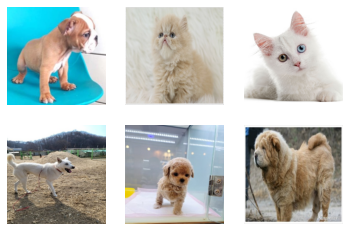

In [ ]:
plt.figure(figsize = (6, 4))

for i in range(len(test_img_list)):

  plt.subplot(2, 3, i+1)
  plt.axis('off')
  plt.imshow(test_img_list[i])

plt.show()

In [ ]:
for i in range(len(test_img_list)):

  print(test_img_list[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
import numpy as np

print(np.array(test_img_list).shape)

(6, 224, 224, 3)


In [ ]:
class_name = ['cat', 'dog']

pred = model.predict(np.array(test_img_list))

print(pred.shape)
print(pred)

(6, 2)
[[7.0869084e-04 9.9929130e-01]
 [9.8764569e-01 1.2354351e-02]
 [9.9997532e-01 2.4674575e-05]
 [4.4649685e-04 9.9955350e-01]
 [5.2248067e-01 4.7751930e-01]
 [1.3890280e-03 9.9861097e-01]]


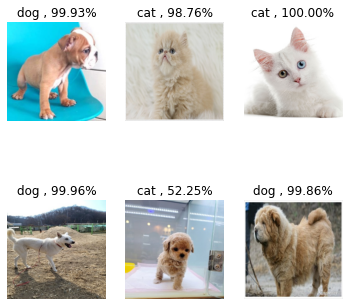

In [ ]:
plt.figure(figsize = (6, 6))

for i in range(len(pred)):

    plt.subplot(2, 3, i+1)
    prediction = str(class_name[np.argmax(pred[i])])
    probility = '{0:0.2f}'.format(100*max(pred[i]))
    title_str = prediction + ' , ' + probility + '%'
    plt.axis('off')
    plt.title(title_str)
    plt.imshow(test_img_list[i])

plt.show()